# **Ejercicio Semana 5: Segmentación**

Visión por Computador

Ingeniería Agronómica

Monica Paola Vargas Tirado

# **K-Means usando SkLearns**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
image = cv2.imread('/content/drive/MyDrive/UNIVERSIDAD EAFIT/VISION POR COMPUTADOR/EJERCICIOS/Dataset/Cat4.png')

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = image.reshape((-1, 3))

num_clusters = 9

kmeans = KMeans(n_clusters=num_clusters)

kmeans.fit(pixels)

labels = kmeans.labels_

centers = np.uint8(kmeans.cluster_centers_)
segmented_image1 = centers[labels].reshape(image.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **K-Means usando OpenCV**

In [ ]:
import numpy as np
import cv2

pixels = image.reshape((-1, 3)).astype(np.float32)

num_clusters = 9

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

segmented_image2 = centers[labels.flatten()].reshape(image.shape)

# **Comparación**

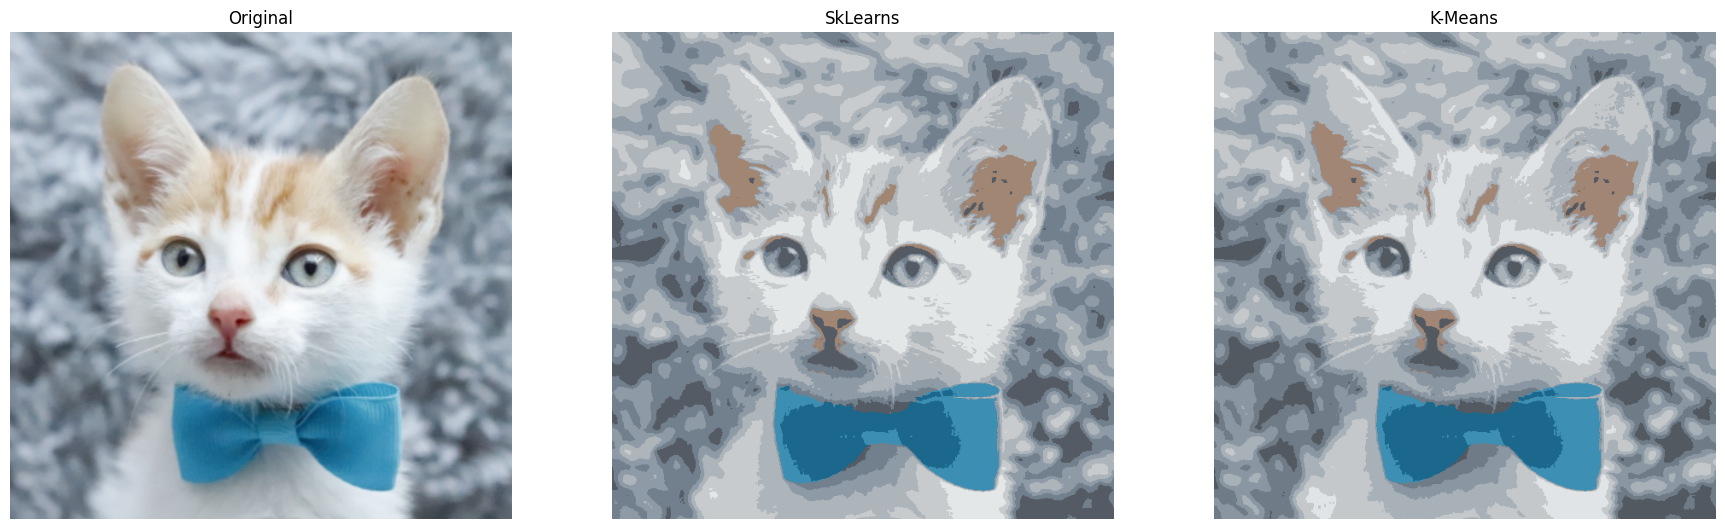

In [ ]:
plt.figure(figsize=(22, 11))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(segmented_image1)
plt.title("SkLearns")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(segmented_image2)
plt.title("K-Means")
plt.axis('off')
plt.show()